In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
dataframe = pd.read_csv("analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [3]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [4]:
#vemos cuantos usuarios hay de cada categoria
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


C:\Users\chema\AppData\Local\Temp\ipykernel_13288\492286010.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop(['categoria'],1).hist()


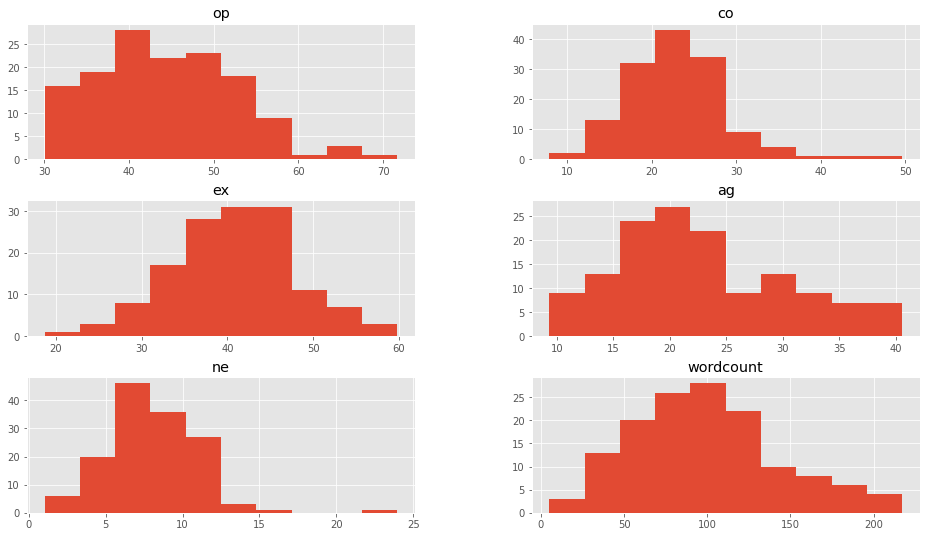

In [5]:
dataframe.drop(['categoria'],1).hist()
plt.show()#histograma por cada atributo

In [6]:
#Para el ejercicio, sólo seleccionamos 3 dimensiones, para poder graficarlo
X = np.array(dataframe[["op","ex","ag"]])#seleccionamos 3 atributos
y = np.array(dataframe['categoria'])#seleccionamos la clase
print(X.shape)
print(y.shape)

(140, 3)
(140,)


In [7]:
print(X[:, 0])#primer acolumnas

[34.297953 44.986842 41.733854 40.377154 36.664677 33.531771 31.851102
 31.865118 46.393488 39.436667 52.750992 41.328182 54.407727 47.610076
 39.435149 48.617348 40.073543 43.37292  49.792403 30.020465 36.909459
 50.594462 34.186667 31.215455 47.27686  45.369773 35.943438 36.272348
 44.501603 49.028308 34.235923 53.11048  49.28542  52.895725 30.691797
 34.949528 41.76596  30.825938 38.948976 46.955854 45.053969 45.088504
 42.444615 40.046439 52.535221 56.691163 48.709282 53.453713 31.450855
 31.891474 49.077731 36.196989 38.91342  60.225087 35.545054 56.815859
 49.47     47.811742 35.779512 55.974031 40.502021 38.78828  52.082462
 57.427596 39.528547 39.36155  66.665564 48.587099 52.675729 45.813043
 44.765313 42.643386 44.512578 51.830571 42.202857 57.241308 36.353298
 35.566589 33.422105 31.7503   33.332362 41.929385 57.145227 46.137348
 49.331231 44.171154 49.322373 46.158281 48.355859 47.143474 48.403333
 40.281616 49.049323 47.737462 48.743333 38.766702 38.471406 54.911368
 37.24

In [8]:
for row in y:
    print(row)#cada uno de los de y

7
7
4
2
4
7
7
5
7
7
3
1
1
2
8
3
4
6
2
4
2
3
3
7
2
4
8
1
4
3
8
1
2
7
4
5
1
2
2
1
6
2
6
1
1
2
6
3
1
7
2
8
6
2
8
2
1
3
8
2
8
4
2
1
8
9
1
1
2
4
6
8
8
4
9
2
8
4
4
9
5
2
4
1
2
7
2
3
2
1
2
7
2
2
1
7
7
2
4
6
1
1
1
4
2
4
2
8
7
5
9
9
8
9
7
1
8
2
4
8
8
2
2
1
2
1
6
2
4
2
1
1
1
7
3
7
4
2
1
1


C:\Users\chema\AppData\Local\Temp\ipykernel_13288\1307033979.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


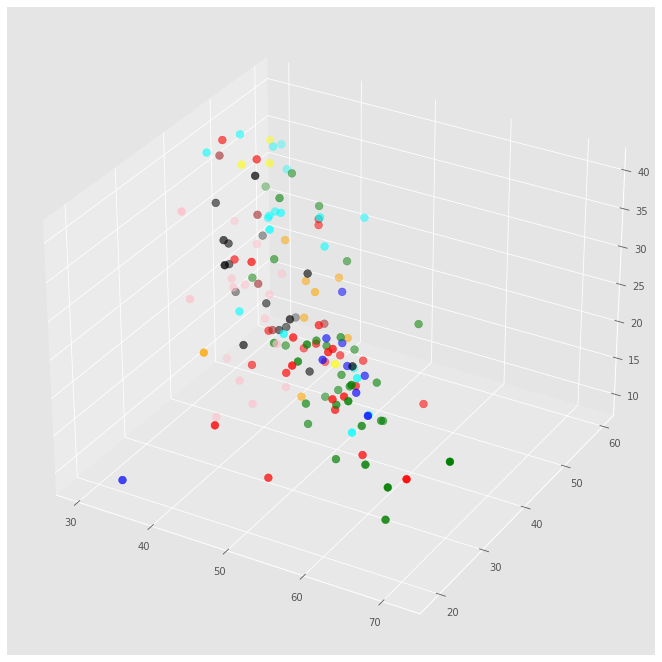

In [9]:
fig = plt.figure()#grafico en 3d
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple'] 
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)#las columnas y los colores

In [10]:
for i in range(1,20):
    KMeans(n_clusters=i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


[-25194.03935276632, -12632.031536945233, -9970.269507368987, -8360.49707936836, -6965.821039394527, -6101.631158702987, -5563.80175751622, -4900.274340041015, -4529.072031349808, -3959.482713800937, -3719.5831925165176, -3460.3154820853965, -3171.751858487259, -2987.212369235224, -2785.403900087106, -2611.634234706596, -2491.16198540083, -2362.3727168643977, -2247.9545198375663]


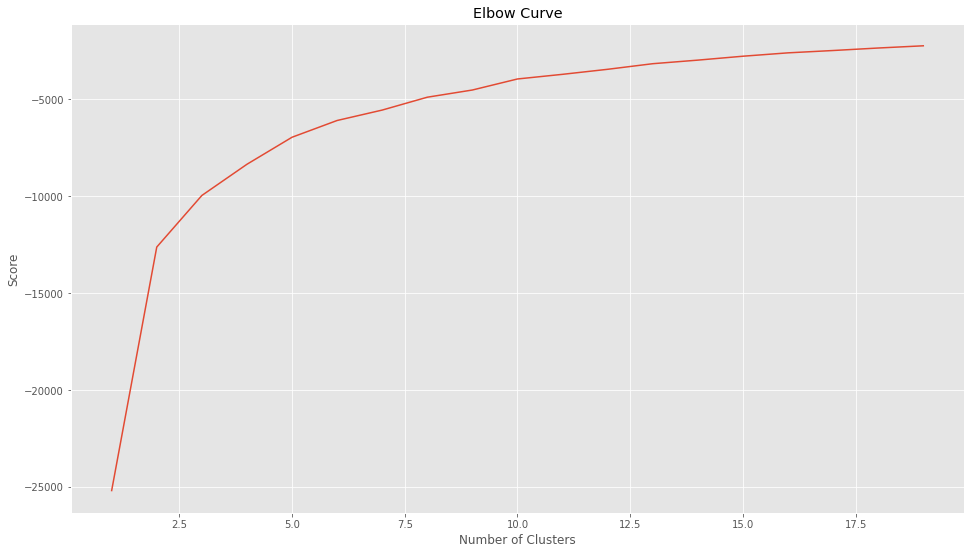

In [11]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]

print(score)
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [13]:
# elegimos 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[49.6606333  41.17669023 17.548775  ]
 [39.63830586 44.75784737 25.86962057]
 [57.92200861 31.5039735  15.67199517]
 [34.5303535  48.01261321 35.01749504]
 [42.302263   33.65449587 20.812626  ]]


C:\Users\chema\AppData\Local\Temp\ipykernel_884\3751313326.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


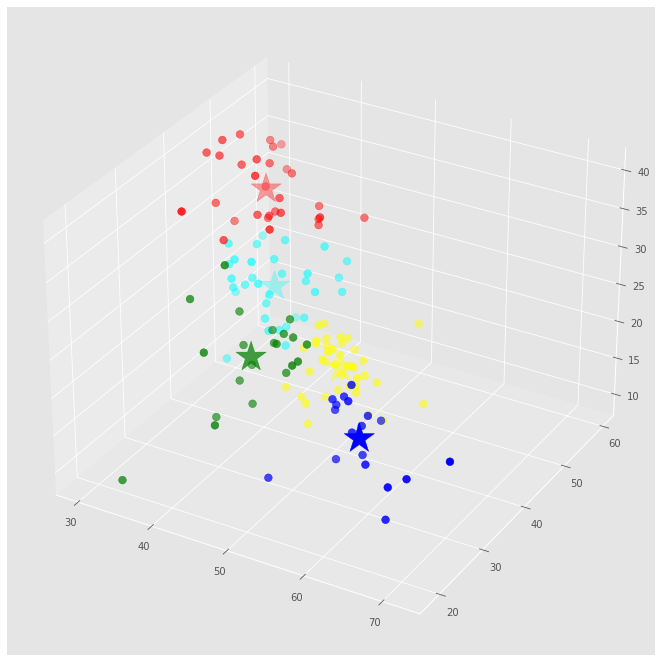

In [11]:
# hacemos predicion
labels = kmeans.predict(X)
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

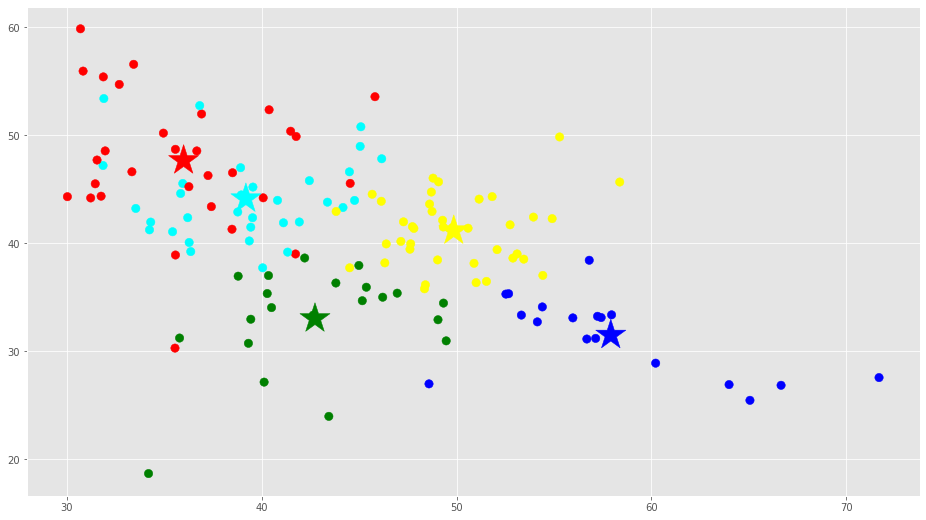

In [12]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = dataframe['op'].values
f2 = dataframe['ex'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

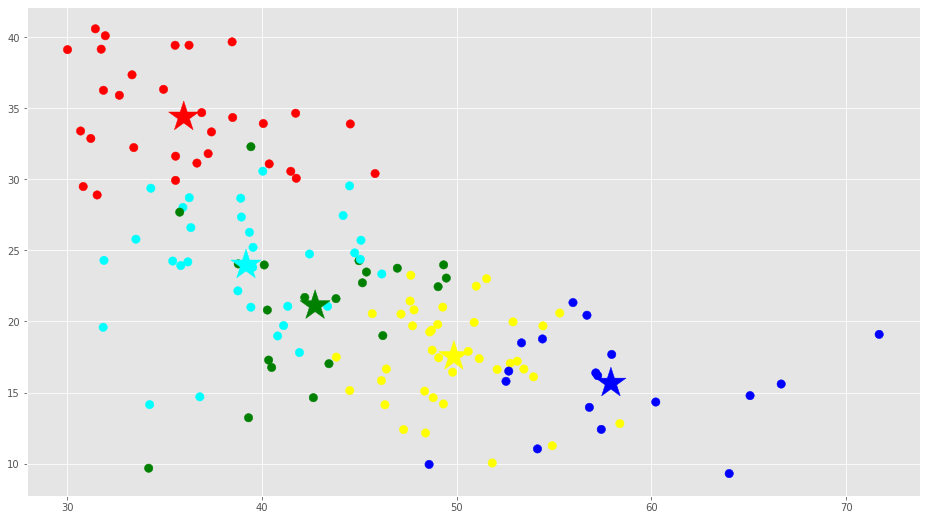

In [13]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = dataframe['op'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

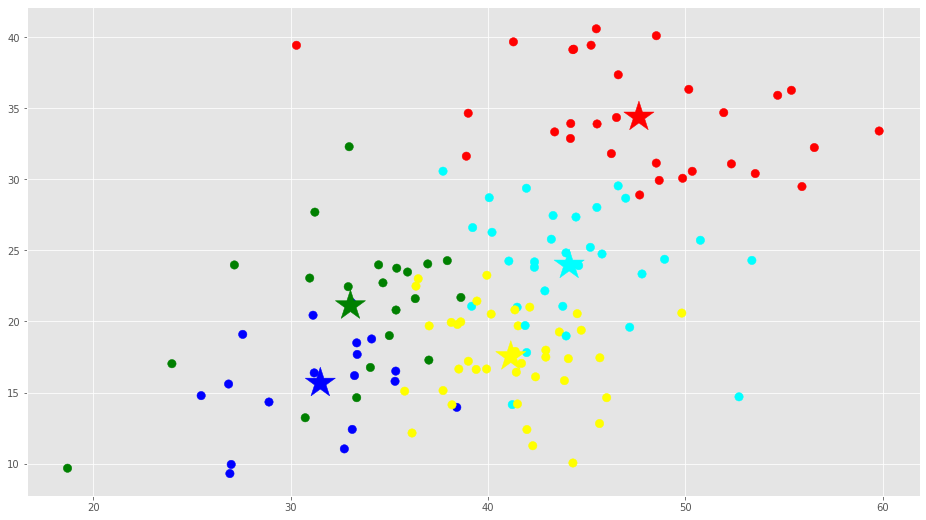

In [14]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values

'''
# este codigo comentado agrega las categorias sobre cada punto
for label, x, y in zip(dataframe['categoria'].values, f1, f2):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
'''
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [15]:
# contamos cuantos usuarios hay en cada grupo
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,30
1,green,21
2,blue,18
3,cyan,32
4,yellow,39


In [16]:
# Veamos cuantos usuarios en cada categoria hay en el grupo 0
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,3.0
2,2,4.0
3,3,NaN
4,4,12.0
5,5,3.0
6,6,NaN
7,7,3.0
8,8,2.0
9,9,3.0


In [17]:
#imprimimos en pantalla los usuarios con categoria 2 del grupo
for index, row in group_referrals.iterrows():
    if row["categoria"] == 2:
        print (row["usuario"], row["categoria"],row["label"])

AlejandroSanz 2 0
CarlosAuryn 2 0
davidbisbal 2 0
SerranoIsmael 2 0


In [19]:
#miramos los usuarios del grupo 0
for index, row in copy.iterrows():
    if row["label"] == 0:
        print (row["usuario"], row["categoria"],row["label"])

albertochicote 4 0
AlejandroSanz 2 0
alfredocasero1 4 0
andykusnetzoff 5 0
Berto_Romero 4 0
Buenafuente 4 0
CarlosAuryn 2 0
CasillasWorld 7 0
CristiPedroche 4 0
DaniMateoAgain 5 0
DANIROVIRA 1 0
davidbisbal 2 0
eva_hache 1 0
GeorgeHWBush 8 0
JesusCalleja 4 0
jordievole 4 0
jordiGlez 4 0
josjaviersantos 9 0
JPVarsky 5 0
manuginobili 7 0
maria_patino 4 0
NadalMiki 4 0
perezreverte 9 0
pnique 8 0
porliniers 9 0
ristomejide 4 0
SerranoIsmael 2 0
XabiAlonso 7 0
XaviRodriguez 4 0
_josecoronado_ 1 0


In [20]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta personality traits
new_labels = kmeans.predict(X_new)
print(new_labels)

#NOTA: en el array podemos poner más de un array para evaluar a varios usuarios nuevos a la vez

[4]
